In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [2]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

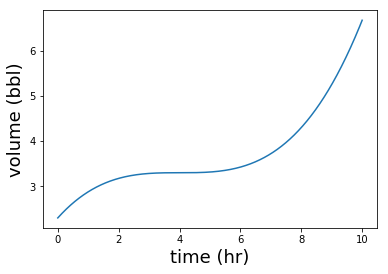

In [3]:
plot_function(volume , 0, 10,tlabel='time (hr)',xlabel='volume (bbl)')

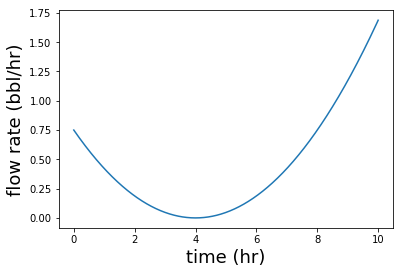

In [4]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')

In [5]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)

In [6]:
volume(9)

5.253125

In [7]:
volume(4)

3.3

In [8]:
volume(9) - volume(4)

1.953125

In [9]:
1.95 / 5

0.39

In [10]:
average_flow_rate(volume,4,9)

0.390625

In [11]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

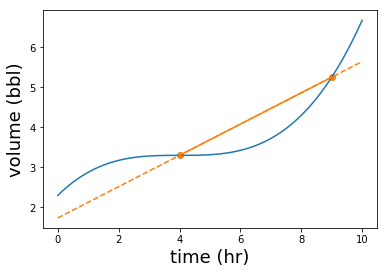

In [12]:
plot_function(volume , 0, 10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(secant_line(volume,4,9),0,10,c='C1',linestyle="dashed")
plot_secant(volume,4,9,color='C1')

In [13]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

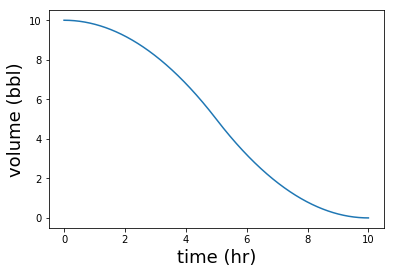

In [14]:
plot_function(decreasing_volume , 0, 10,tlabel='time (hr)',xlabel='volume (bbl)')

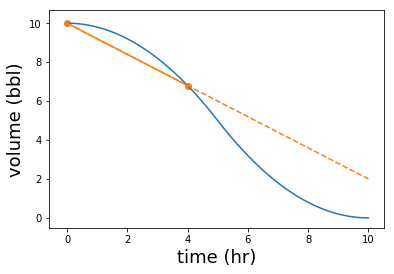

In [15]:
plot_function(decreasing_volume , 0, 10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(secant_line(decreasing_volume,0,4),0,10,c='C1',linestyle="dashed")
plot_secant(decreasing_volume,0,4,color='C1')

In [16]:
decreasing_volume(4)

6.8

In [17]:
average_flow_rate(decreasing_volume,0,4)

-0.8

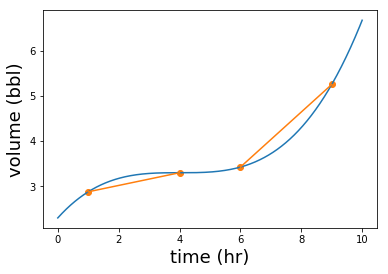

In [18]:
plot_function(volume , 0, 10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_secant(volume,6,9,color='C1')
plot_secant(volume,1,4,color='C1')

In [19]:
average_flow_rate(volume,0,1)

0.578125

In [20]:
# def interval_flow_rates(t1,t2,dt):
#     return []
import numpy as np
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [21]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt))
                for t in np.arange(t1,t2,dt)]

In [22]:
interval_flow_rates(volume,0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

In [100]:
def plot_interval_flow_rates(volume,t1,t2,dt,tlabel='time (hr)',xlabel='flow rate (bbl/hr)'):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)
    plt.xlabel(tlabel,fontsize=18)
    plt.ylabel(xlabel,fontsize=18)

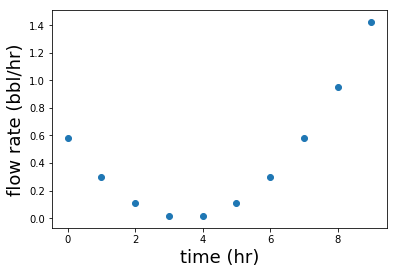

In [101]:
plot_interval_flow_rates(volume,0,10,1)

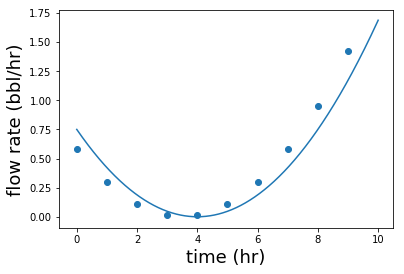

In [102]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_interval_flow_rates(volume,0,10,1)

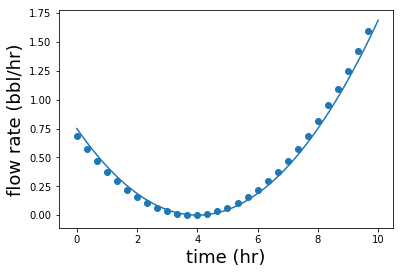

In [103]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_interval_flow_rates(volume,0,10,1/3)

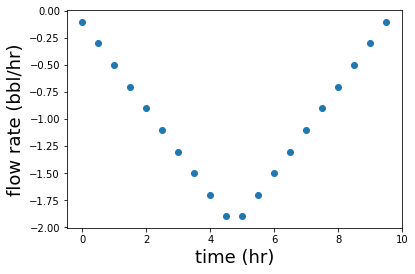

In [104]:
plot_interval_flow_rates(decreasing_volume,0,10,0.5)

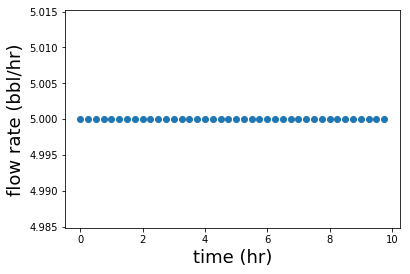

In [106]:
def linear_volume_function(t):
    return 5*t + 3

plot_interval_flow_rates(linear_volume_function,0,10,0.25)

In [107]:
volume(1)

2.878125

In [108]:
secant_line(volume,0.999,1.001)(1)

2.8781248593749997

In [27]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v,t-h,t+h)
    for i in range(0,digits*2):
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

In [28]:
import math
instantaneous_flow_rate(volume,1.23456789)

0.358482

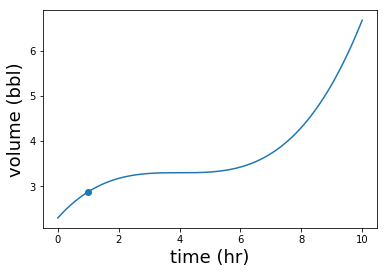

In [29]:
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plt.scatter([1],[volume(1)])

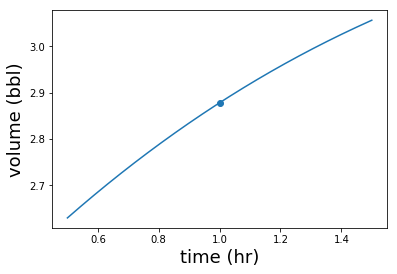

In [30]:
plot_function(volume,0.5,1.5,tlabel='time (hr)',xlabel='volume (bbl)')
plt.scatter([1],[volume(1)])

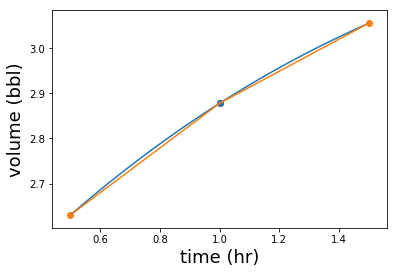

In [31]:
plot_function(volume,0.5,1.5,tlabel='time (hr)',xlabel='volume (bbl)')

plot_secant(volume,0.5,1.0,color='C1')
plot_secant(volume,1.0,1.5,color='C1')
plt.scatter([1],[volume(1)])

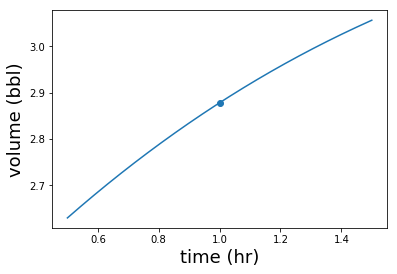

In [32]:
plot_function(volume,0.5,1.5,tlabel='time (hr)',xlabel='volume (bbl)')
plt.scatter([1],[volume(1)])

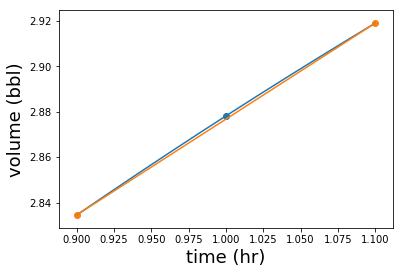

In [33]:
plot_function(volume,0.9,1.1,tlabel='time (hr)',xlabel='volume (bbl)')
plot_secant(volume,0.9,1.1,color='C1')
plt.scatter([1],[volume(1)])

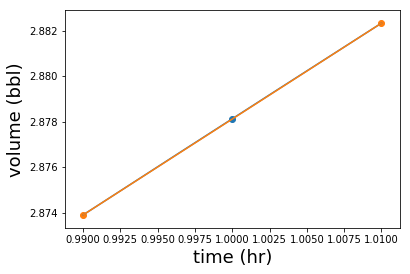

In [34]:
plot_function(volume,0.99,1.01,tlabel='time (hr)',xlabel='volume (bbl)')
plot_secant(volume,0.99,1.01,color='C1')
plt.scatter([1],[volume(1)])

In [35]:
average_flow_rate(volume,0.5,1.5)

0.42578125

In [36]:
average_flow_rate(volume,0.9,1.1)

0.4220312499999988

In [37]:
average_flow_rate(volume,0.99,1.01)

0.42187656249998945

In [38]:
average_flow_rate(volume,0.999,1.001)

0.42187501562509583

In [39]:
average_flow_rate(volume,0.9999,1.0001)

0.42187500015393936

In [40]:
average_flow_rate(volume,0.99999,1.00001)

0.4218750000002602

In [41]:
flow_rate(1)

0.421875

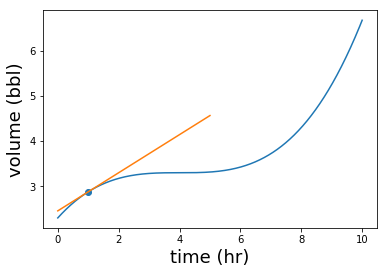

In [42]:
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(secant_line(volume,0.99999,1.00001),0,5,c='C1')
plt.scatter([1],[volume(1)])

In [43]:
instantaneous_flow_rate(volume,1,digits=4)

0.4219

In [44]:
average_flow_rate(volume,0.5,1.5)

0.42578125

In [45]:
def sign(x):
    return (1 if x > 0 else -1)

In [46]:
# DOES NOT CONVERGE
#instantaneous_flow_rate(sign,0,10)

In [47]:
instantaneous_flow_rate(volume,1)

0.421875

In [48]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_flow_rate(volume,t)
    return flow_rate_function

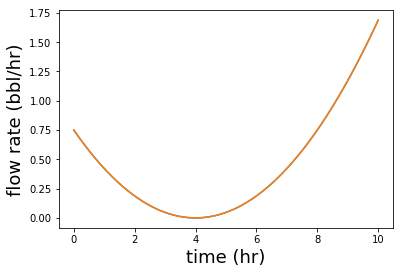

In [49]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(get_flow_rate_function(volume),0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')

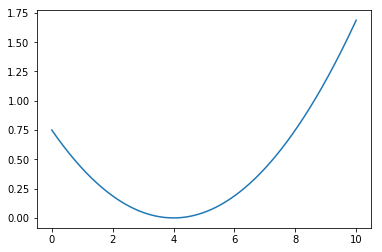

In [50]:
plot_function(get_flow_rate_function(volume),0,10)

In [51]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [52]:
small_volume_change(flow_rate,2,1)

0.1875

In [53]:
volume(3) - volume(2)

0.109375

In [54]:
small_volume_change(flow_rate,2,0.01)

0.001875

In [55]:
volume(2.01) - volume(2)

0.0018656406250001645

In [56]:
def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
               for t in np.arange(t1,t2,dt))

In [57]:
volume_change(flow_rate,0,10,0.1)

4.32890625

In [58]:
volume(10) - volume(0)

4.375

In [59]:
volume_change(flow_rate,0,10,0.0001)

4.3749531257812455

In [60]:
def draw_rectangle(f,x,dx):
    y = f(x)
    plt.plot([x,x,x+dx,x+dx,x],
             [0,y,y,0,0], c='C1')

    plt.gca().fill([x,x,x+dx,x+dx],
                     [0,y,y,0],c='C1',alpha=0.3)
    
def draw_definite_integral(f,tstart,tend,interval):
    all_intervals = np.arange(tstart,tend,interval)
    for t in all_intervals:
        draw_rectangle(f,t,interval)

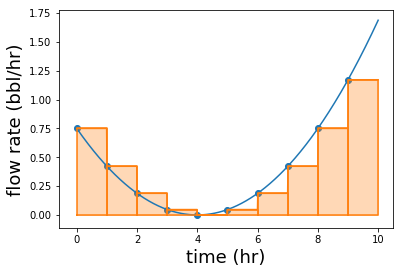

In [61]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plt.scatter(range(0,10),[flow_rate(t) for t in range(0,10)])
plot_function(lambda x: flow_rate(x-x%1),0,9.9999)
draw_definite_integral(flow_rate,0,10,1)

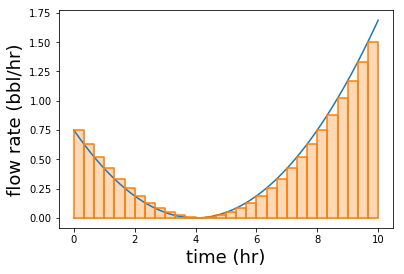

In [62]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
# plt.scatter(range(0,10),[flow_rate(t) for t in range(0,10)])
# plot_function(lambda x: flow_rate(x-x%(1)),0,9.9999)
draw_definite_integral(flow_rate,0,10,1/3)

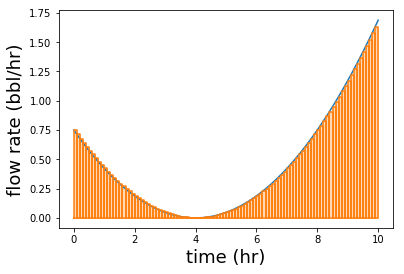

In [63]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
# plt.scatter(range(0,10),[flow_rate(t) for t in range(0,10)])
# plot_function(lambda x: flow_rate(x-x%(1)),0,9.9999)
draw_definite_integral(flow_rate,0,10,0.1)

In [64]:
def approximate_volume(q,v0,dt,T):
    return v0 + volume_change(q,0,T,dt)

In [65]:
approximate_volume(flow_rate,volume(0),0.0001,10)

6.674953125781245

In [66]:
volume(10)

6.675

In [67]:
def approximate_volume_function(q,v0,dt):
    def volume_function(T):
        return approximate_volume(q,v0,dt,T)
    return volume_function

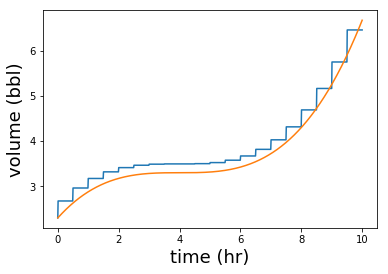

In [68]:
plot_function(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')

In [69]:
approximate_volume(flow_rate,2.3,0.5,4)

3.4953125

In [70]:
approximate_volume(flow_rate,2.3,0.5,8)

4.315625

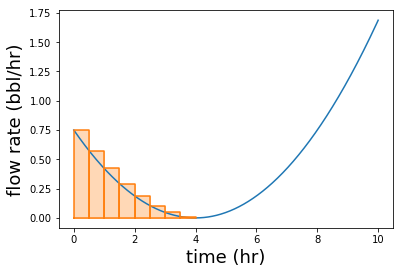

In [71]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
# plt.scatter(range(0,10),[flow_rate(t) for t in range(0,10)])
# plot_function(lambda x: flow_rate(x-x%(1)),0,9.9999)
draw_definite_integral(flow_rate,0,4,0.5)

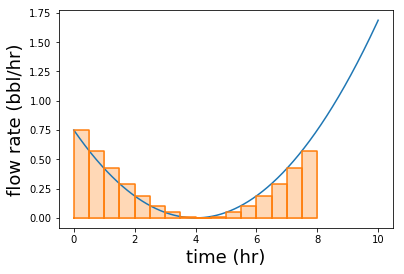

In [72]:
plot_function(flow_rate,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
# plt.scatter(range(0,10),[flow_rate(t) for t in range(0,10)])
# plot_function(lambda x: flow_rate(x-x%(1)),0,9.9999)
draw_definite_integral(flow_rate,0,8,0.5)

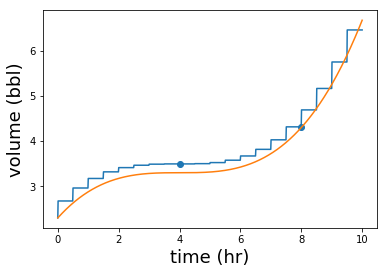

In [73]:
plot_function(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plt.scatter([4,8],[approximate_volume(flow_rate,2.3,0.5,4),approximate_volume(flow_rate,2.3,0.5,8)])

In [74]:
np.arange(0,3.9,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

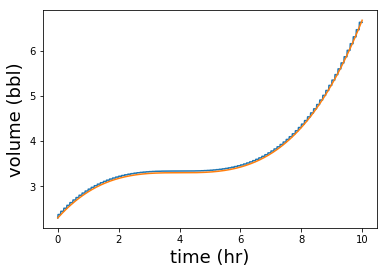

In [75]:
plot_function(approximate_volume_function(flow_rate,2.3,0.1),0,10)
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')

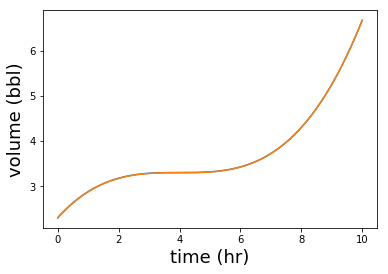

In [76]:
plot_function(approximate_volume_function(flow_rate,2.3,0.01),0,10)
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')

(4.28, 4.32)

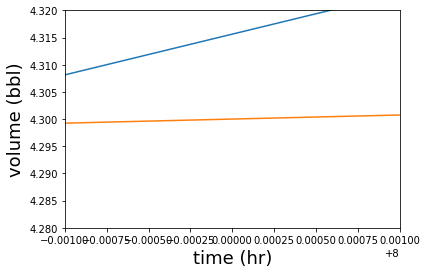

In [77]:
plot_function(approximate_volume_function(flow_rate,2.3,0.1),0,10)
plot_function(volume,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plt.xlim(7.999,8.001)
plt.ylim(4.28,4.32)

In [78]:
def get_volume_function(q,v0,digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q,0,T,dt)
        for i in range(0,digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q,0,T,dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

In [79]:
v = get_volume_function(flow_rate,2.3,digits=3)
v(1)

2.878

In [80]:
v = get_volume_function(flow_rate,2.3,digits=6)
v(1)

2.878125

In [81]:
volume(1)

2.878125

In [82]:
volume(4)

3.3

In [83]:
v(2)

3.175

In [84]:
volume(2)

3.175

In [85]:
v(8)

4.3

In [86]:
volume(8)

4.3

In [87]:
volume

<function __main__.volume(t)>

In [88]:
volume(5)

3.315625

In [110]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [111]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [112]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [113]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

In [114]:
def sign(x):
    return x / abs(x)

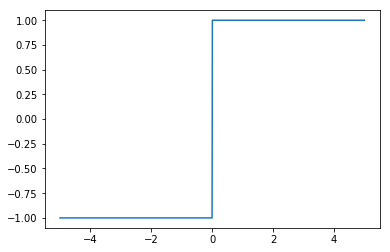

In [115]:
plot_function(sign,-5,5)

In [116]:
average_flow_rate(sign,-0.1,0.1)

10.0

In [117]:
average_flow_rate(sign,-0.01,0.01)

100.0

In [118]:
average_flow_rate(sign,-0.001,0.001)

1000.0

In [119]:
average_flow_rate(sign,-0.000001,0.000001)

1000000.0

In [121]:
volume_change(flow_rate,0,6,0.01)

1.1278171874999996

In [122]:
volume_change(flow_rate,6,10,0.01)

3.2425031249999257

In [123]:
decreasing_rate

NameError: name 'decreasing_rate' is not defined